# Optimization
## Homework 1 Solutions

In [1]:
import numpy as np
import gurobipy as gp
import matplotlib.pyplot as plt

## Problem 1

### Solution:

Let the numbers of torte and apple pie Max eats be $x_1$ and $x_2$ separately. The objective function is
\begin{align}
4x_1+5x_2
\end{align}
Because the contest lasts 1 hour, the time constraint is 
\begin{align}
2x_1+3x_2\le 60
\end{align}
Of course, we still have non-negative constraints for both $x_1$ and $x_2$, namely
\begin{align}
x_1\ge 0, x_2\ge 0.
\end{align}
From the constraints just listed, we can draw the graph as following

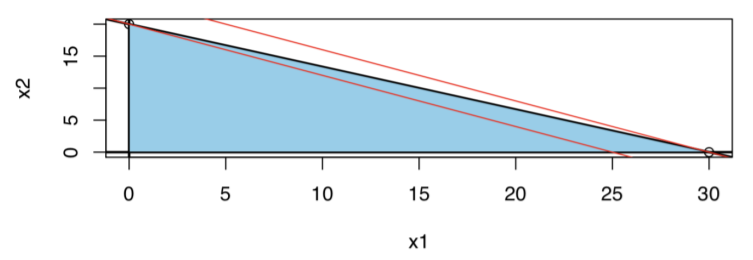

Three constraints are represented by three bold black lines; the sky blue region is the feasible region. Two red lines are isoprofit lines at two vertexes. clearly vertex (30,0) is the optimal solution.

If Max sticks to his preference, the number of pies he eats $x_1$ will be greater than or equal to the number of tortes $x_2$. In other words, another constraint
\begin{align}
x_2\le x_2
\end{align}
ahould be added.

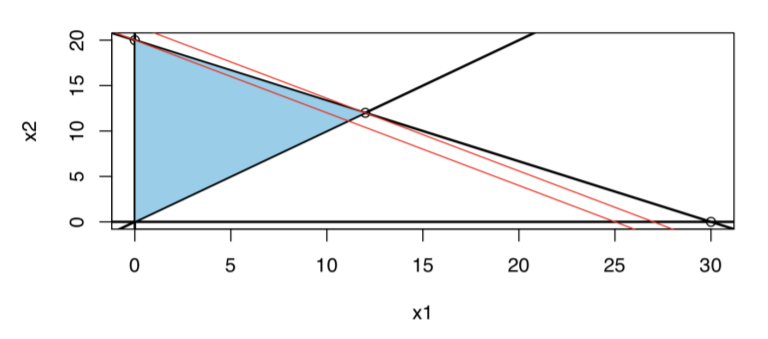

Right now, (12,12) is the optimal solution.

The points decrease is 

In [2]:
(4*30 + 5*0) - (4*12 + 5*12)

12

## Problem 2

### Solution:

a) Let the acres of wheat and corn be $x_1$ and $x_2$ searately. The objective function is 
\begin{align}
2000x_1 + 3000x_2.
\end{align}
The total acres constraint is
\begin{align}
x_1+x_2\le 450
\end{align}
The worker constraint is 
\begin{align}
3x_1+2x_2\le 1000.
\end{align}
The fertilizer constraint is 
\begin{align}
2x_1+4x_2\le 1200.
\end{align}
Ofcourse, we still have the nonnegative constraints for both namely
\begin{align}
x_1\ge 0, x_2\ge 0.
\end{align}
Combining the constraints, we draw the graph as below.

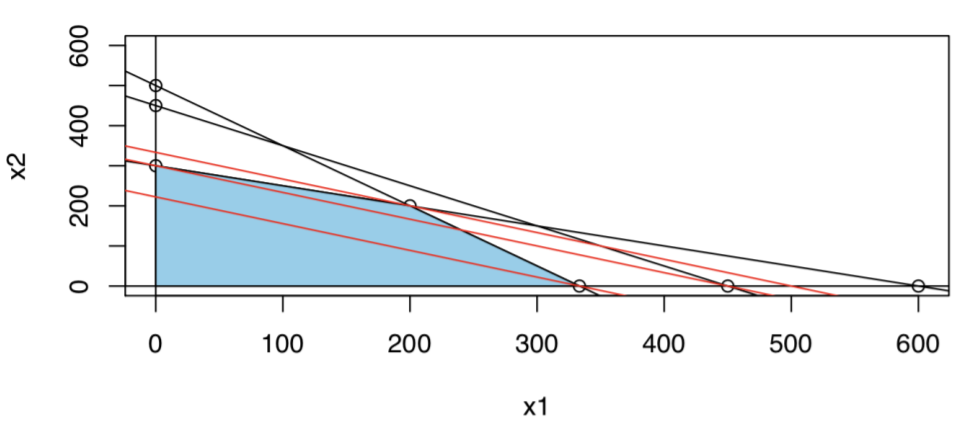

The optimal solution is (200,200)

b) We try to use gurobi on Python to solve the problem again

In [3]:
#Define LP Matrices
obj = np.array([2000,2000])
A = np.array([[1, 1],[3, 2],[2, 4]])
b = np.array([450,1000,1200])

#Set-up LP in gurobipy
m = gp.Model()
mX = m.addMVar(2) #Lower Bound by default is 0
mCons = m.addConstrs((gp.quicksum(mX[j]*A[i,j] for j in range(2)) <= b[i]) for i in range(3))
m.setObjective(gp.quicksum(obj[j] * mX[j] for j in range(2)),sense=gp.GRB.MAXIMIZE)

m.Params.OutputFlag = 0

#Solve the LP using gurobi 
m.optimize()

#Print value of objective function and decision variables 
print(m.objval)
print(mX.x)

Set parameter Username
Academic license - for non-commercial use only - expires 2024-10-19
800000.0
[200. 200.]


The solution from gurobi is the same as the graphic solution.

c)

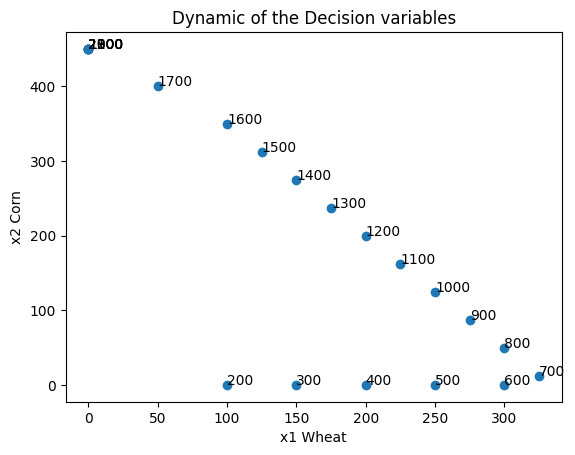

In [4]:
#Define LP Matrices
obj = np.array([2000, 2000])
A = np.array([[1, 1],[3, 2],[2, 4]])
b = np.array([450,1000,1200])


#Preparing for 'for-loop'
fertilizer = np.arange(200,2300,100)
n = np.size(fertilizer)
Sol = np.empty((n,2))
Value = np.empty((n,1))


#Running the 'for-loop'
for i in range(0,n):
    b[2] = fertilizer[i]
    
    #Set-up LP in gurobipy
    m = gp.Model()
    mX = m.addMVar(2) #Lower Bound by default is 0
    mCons = m.addConstrs((gp.quicksum(mX[j] * A[i,j] for j in range(2)) <= b[i]) for i in range(3))
    m.setObjective(gp.quicksum(obj[j]*mX[j] for j in range(2)), sense = gp.GRB.MAXIMIZE)
    m.Params.OutputFlag = 0

    #Solve the LP using gurobi 
    m.optimize()
    
    Sol[i,] = mX.x
    Value[i] = m.objval

#Plotting the Solution Points
plt.plot(Sol[:,0],Sol[:,1],marker='o',linestyle='')
plt.xlabel('x1 Wheat')
plt.ylabel('x2 Corn')
plt.title('Dynamic of the Decision variables')
for i in range(0,len(fertilizer)):
    plt.annotate(fertilizer[i], (Sol[i,0], Sol[i,1]))

## Problem 3

### Solution:

Let the money invested in the ith opportunity be $x_i$. We can formuate the LP as following
\begin{align}
\textrm{maximize   } & 13x_1+16x_2+16x_3+14x_4+30x_5\\
\textrm{subject to   } & 11 x_1+53x_2+5x_3+5x_4+29x_5\le 40\\
& 3x_1+6x_2+5x_3+1x_4+34x_5\le 20\\
& x_1,x_2,x_3,x_4,x_5\le 1\\
& x_1,x_2,x_3,x_4,x_5\ge 0
\end{align}

In [5]:
obj = np.array([13,16,16,14,39])
A = np.array([[11,53,5,5,29],[3,6,5,1,34]])
b = np.array([40,20])

#Set-up LP in gurobipy
m = gp.Model()
mX = m.addMVar(5,lb=[0,0,0,0,0],ub=[1,1,1,1,1]) #Lower Bound by default is 0
mCon = m.addConstrs((gp.quicksum(mX[j]*A[i,j] for j in range(5)) <= b[i]) for i in range(2))
m.setObjective(gp.quicksum(obj[j]*mX[j] for j in range(5)), sense = gp.GRB.MAXIMIZE)
m.Params.OutputFlag = 0

#Solve the LP using gurobi 
m.optimize()

mX.x

array([1.        , 0.20085995, 1.        , 1.        , 0.28808354])

## Problem 4

### Solution:

Let the number of servings of corn, milk, and bread be $x_1,x_2,x_3$ separately. We can formulate the linear programming problem as following
\begin{align}
\textrm{minimize   } & 0.18x_1+0.23x_2+0.05x_3\\
\textrm{subject to   } & 5000 \le 107x_1+500x_2\le 50000\\
& 2000 \le 72x_1 + 121x_2 + 65x_3 \le 2250\\
&x_1,x_2,x_3\le 10\\
&x_1,x_2,x_3\ge 0.
\end{align}

In [6]:
obj = np.array([0.18,0.23,0.05])
A = np.array([[107,500,0],[107,500,0],[72,121,65],[72,121,65]])
b = np.array([5000,50000,2000,2250])

#Set-up LP in gurobipy
m = gp.Model()
mX = m.addMVar(3,lb=[0,0,0],ub=[10,10,10]) #Lower Bound by default is 0
mCons1 = m.addConstrs((gp.quicksum(mX[j]*A[i,j] for j in range(3)) >= b[i]) for i in [0,2])
mCons2 = m.addConstrs((gp.quicksum(mX[j]*A[i,j] for j in range(3)) <= b[i]) for i in [1,3])
m.setObjective(gp.quicksum(obj[j]*mX[j] for j in range(3)), sense = gp.GRB.MINIMIZE)
m.Params.OutputFlag = 0

#Solve the LP using gurobi 
m.optimize()

mX.x

Warning for adding constraints: zero or small (< 1e-13) coefficients, ignored


array([ 1.94444444, 10.        , 10.        ])

## Problem 5

### Solution:

Let the acreage harvested in year 1,2 and 3 in unit 1 be $x_1,x_2,x_3$ respectively and let the acreage harvested in year 1,2, and 3 in unit be $y_1,y_2,y_3$ respectively.

the objective function is 
\begin{align}
\textrm{maximize    } x_1+1.3x_2+1.4x_3+y_1+1.2y_2+1.6y_3
\end{align}
The constraint for available acreage in each unit is:
\begin{align}
x_1+x_2+x_3\le 2\\
y_1+y_2+y_3\le 3
\end{align}
The firm wants to harvest atleast 1.2,1.5 and 2 tonnes in year 1,2 and 3 respectively giving the constraints:
\begin{align}
x_1+y_1\ge 1.2\\
1.3x_2+1.2y_2\ge 1.5\\
1.4x_3+1.6y_3\ge 2
\end{align}
There are capacity constraints on the amount of wood that can be harvested in each year.
\begin{align}
x_1+y_1\le 2\\
1.3x_2+1.2y_2\le 2\\
1.4x_3+1.6y_3\le 3
\end{align}
We also have the non-negative constraints:
\begin{align}
x_1\ge 0, x_2\ge 0, x_3\ge 0, y_1\ge 0, y_2\ge 0, y_3\ge 0
\end{align}

In [7]:
obj = np.array([1,1.3,1.4,1,1.2,1.6])
A = np.array([[1,1,1,0,0,0],[0,0,0,1,1,1],[1,0,0,1,0,0],[0,1.3,0,0,1.2,0],[0,0,1.4,0,0,1.6],[1,0,0,1,0,0],[0,1.3,0,0,1.2,0],[0,0,1.4,0,0,1.6]])
b = np.array([2,3,1.2,1.5,2,2,2,3])

#Set-up LP in gurobipy
m = gp.Model()
mX = m.addMVar(6) #Lower Bound by default is 0
mCons1 = m.addConstrs((gp.quicksum(mX[j]*A[i,j] for j in range(6)) <= b[i]) for i in [0,1,5,6,7])
mCons2 = m.addConstrs((gp.quicksum(mX[j]*A[i,j] for j in range(6)) >= b[i]) for i in [2,3,4])
m.setObjective(gp.quicksum(obj[j]*mX[j] for j in range(6)), sense = gp.GRB.MAXIMIZE)
m.Params.OutputFlag = 0

#Solve the LP using gurobi 
m.optimize()

mX.x
    

Warning for adding constraints: zero or small (< 1e-13) coefficients, ignored


array([0.46153846, 1.53846154, 0.        , 1.125     , 0.        ,
       1.875     ])